# Split by IP.DF + DNS.AA

The key observation here is IP.DF + DNS.AA can uniquely distinguish different processes of GFW:

## Injector 1 (DF ==0, DNS_AA ==1)
* In a snapshot experiment, only respond if the query packet has IPTTL >= 16
* IP header length=20; IPID = range(457,65535), have a pattern; DF=0, TOS: Counter({'0x0000': 195111, '0x0010'(minimize delay): 20955, '0x0020': 168})
* IPTTL in a snapshot experiment =(35,234), IPTTL across time = (27, 234), IPTTL global increment by 1;
* UDPLength=68;
* dns.flag.authoritative=1, dns.answer=copy what is in qname;DNSTTL=60
* DNS Flags: Counter({'0x8580': 112894, '0x85a0': 47556, '0x85b0': 36310, '0x8590': 19474})
* Uniq # IPs: 4
* Uniq # domains: 88

## Injector 2  (DF ==1, DNS_AA ==0)
* In a snapshot experiment, only respond if the query packet has IPTTL >= 16
* IP header length=20;IPID = range(0,65535), random; DF=1, TOS=Counter({'0x00000000': 61993489, '0x00000020': 46427, '0x00000048': 1}); IPTTL in a snapshot experiment =(35,114) across_time = (27,114), random;
* UDPLength=55;
* dns.flag.authoritative=0, dns.answer=set a pointer to qname; DNSTTL=(64,255), DNSTTL across time = (1, 86400)
* DNS Flags: Counter({'0x8180': 62039917})
* Unique # IPs: 1506
* Unique # domains: 24729

## Injector 3  (DF ==0, DNS_AA ==0)
* In a snapshot experiment, only respond if the query packet has IPTTL >= 29
* IP header length=20;IPID = 0, DF=0, TOS=Counter({'0x00000000': 57724548, '0x00000020': 43616}); IPTTL in a snapshot experiment =36, across_time (2,40)
* UDPLength=55;
* dns.flag.authoritative=0, dns.answer=set a pointer to qname; DNSTTL=(64,254)
* DNS Flags: Counter({'0x8180': 57768164}) 
* Unique # IPs: 958
* Unique # domains: 22948

## TOS
* TOS can sometimes be 0x00 (always seen), 0x10 (seen for some non-consecutive months) or 0x20 (seen just for 1 day). TOS value is independent from other features and thus cannot be used to distinguish injectors.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.style.use('seaborn-whitegrid')

import numpy as np
from numpy import genfromtxt
import pandas as pd
from collections import Counter

In [2]:
packets = pd.read_csv('../all_more_fields.csv', delimiter=';', header=0)
# , nrows=1000000

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


do not consider 2019-09-16 forward (since we changed the test list at that time)

we freeze the dataset by time between 1568692823.487619 and 1590094531.2941742.

In [ ]:
packets = packets[(packets.ts >= 1568692823.487619) & (packets.ts <= 1590094531.2941742)]

In [3]:
packets

ts                                              qname  \
0          1.568693e+09                                    www.youtube.com   
1          1.568693e+09                                    www.youtube.com   
2          1.568693e+09                                   www.facebook.com   
3          1.568693e+09                                   www.facebook.com   
4          1.568693e+09                                     www.google.com   
5          1.568693e+09                                     www.google.com   
6          1.568693e+09                                  www.instagram.com   
7          1.568693e+09                                  www.instagram.com   
8          1.568693e+09                                  www.wikipedia.org   
9          1.568693e+09                                  www.wikipedia.org   
10         1.568693e+09                                      www.twitch.tv   
11         1.568693e+09                                      www.twitch.tv   
12         1.568693e+09                                  www.google.com.hk   
13         1.568693e+09                                  www.google.com.hk   
14         1.568693e+09                                   www.blogspot.com   
15         1.568693e+09                                   www.blogspot.com   
16         1.568693e+09                                     www.reddit.com   
17         1.568693e+09                                    www.twitter.com   
18         1.568693e+09                                    www.porn555.com   
19         1.568693e+09                                    www.pornhub.com   
20         1.568693e+09                                    www.pornhub.com   
21         1.568693e+09                                 www.livejasmin.com   
22         1.568693e+09                                  www.google.com.br   
23         1.568693e+09                                  www.google.com.br   
24         1.568693e+09                                   www.whatsapp.com   
25         1.568693e+09                                   www.whatsapp.com   
26         1.568693e+09                                   www.amazon.co.jp   
27         1.568693e+09                                   www.amazon.co.jp   
28         1.568693e+09                                      www.google.fr   
29         1.568693e+09                                      www.google.fr   
...                 ...                                                ...   
120024285  1.590165e+09                     www.codigomaldito.blogspot.com   
120024286  1.590165e+09                     www.codigomaldito.blogspot.com   
120024287  1.590165e+09                      www.19650517mgrp.blogspot.com   
120024288  1.590165e+09                      www.19650517mgrp.blogspot.com   
120024289  1.590165e+09                  www.algebralinealssm.blogspot.com   
120024290  1.590165e+09                  www.algebralinealssm.blogspot.com   
120024291  1.590165e+09            www.ancianolegritaaunanube.blogspot.com   
120024292  1.590165e+09            www.ancianolegritaaunanube.blogspot.com   
120024293  1.590165e+09               www.aprendedesexualidad.blogspot.com   
120024294  1.590165e+09               www.aprendedesexualidad.blogspot.com   
120024295  1.590165e+09                   www.apuntesyderecho.blogspot.com   
120024296  1.590165e+09                   www.apuntesyderecho.blogspot.com   
120024297  1.590165e+09                    www.ardilladigital.blogspot.com   
120024298  1.590165e+09                    www.ardilladigital.blogspot.com   
120024299  1.590165e+09                  www.befreakymyfriend.blogspot.com   
120024300  1.590165e+09                  www.befreakymyfriend.blogspot.com   
120024301  1.590165e+09               www.bibliotecasolidaria.blogspot.com   
120024302  1.590165e+09               www.bibliotecasolidaria.blogspot.com   
120024303  1.590165e+09               www.buddhismforyouandme.blogspot.com   
120024304  1.590165e+09               www.b

In [19]:
def summary(pkts):
    print("DF: {}".format(Counter(pkts.df)))
    print("DNS_AA: {}".format(Counter(pkts.dns_aa)))
    print("Min IPID: {}".format(min(pkts.ip_id)))
    print("Max IPID: {}".format(max(pkts.ip_id)))
    print("Min IPTTL: {}".format(min(pkts.ip_ttl)))
    print("Max IPTTL: {}".format(max(pkts.ip_ttl)))
    print("Min DNSTTL: {}".format(min(pkts.dns_ttl)))
    print("Max DNSTTL: {}".format(max(pkts.dns_ttl)))
    print("DNS Flags: {}".format(Counter(pkts.dns_flags)))
    print("TOS: {}".format(Counter(pkts.tos)))
    print("Unique # IPs: {}".format(len(set(pkts.answer))))
    print("Unique # domains: {}".format(len(set(pkts.qname))))

In [20]:
injector1 = ((packets.df == 0) & (packets.dns_aa == 1))
injector2 = ((packets.df == 1) & (packets.dns_aa == 0))
injector3 = ((packets.df == 0) & (packets.dns_aa == 0))
impossible = ~(injector1 | injector2 | injector3)

In [14]:
assert len(packets[impossible]) == 0

In [15]:
int('0x000001c9', 16)

457

In [21]:
summary(packets[injector1])

DF: Counter({0: 216234})
DNS_AA: Counter({1: 216234})
Min IPID: 0x000001c9
Max IPID: 0x0000ffff
Min IPTTL: 27
Max IPTTL: 234
Min DNSTTL: 60
Max DNSTTL: 60
DNS Flags: Counter({'0x00008580': 112894, '0x000085a0': 47556, '0x000085b0': 36310, '0x00008590': 19474})
TOS: Counter({'0x00000000': 195111, '0x00000010': 20955, '0x00000020': 168})
Unique # IPs: 4
Unique # domains: 88


In [22]:
summary(packets[injector2])

DF: Counter({1: 62039917})
DNS_AA: Counter({0: 62039917})
Min IPID: 0x00000000
Max IPID: 0x0000ffff
Min IPTTL: 27
Max IPTTL: 114
Min DNSTTL: 1
Max DNSTTL: 86400
DNS Flags: Counter({'0x00008180': 62039917})
TOS: Counter({'0x00000000': 61993489, '0x00000020': 46427, '0x00000048': 1})
Unique # IPs: 1506
Unique # domains: 24729


In [23]:
summary(packets[injector3])

DF: Counter({0: 57768164})
DNS_AA: Counter({0: 57768164})
Min IPID: 0x00000000
Max IPID: 0x00000000
Min IPTTL: 2
Max IPTTL: 40
Min DNSTTL: 64
Max DNSTTL: 254
DNS Flags: Counter({'0x00008180': 57768164})
TOS: Counter({'0x00000000': 57724548, '0x00000020': 43616})
Unique # IPs: 958
Unique # domains: 22948


In [29]:
set(packets[injector1].answer)

{'46.82.174.69', '59.24.3.174', '8.7.198.46', '93.46.8.90'}

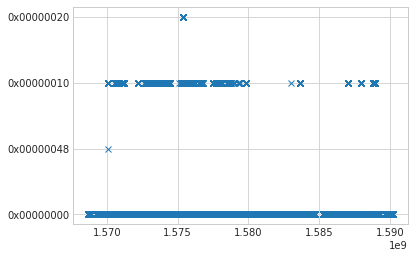

In [28]:
#tos2 = packets[packets.tos == '0x00000020']
plt.plot(packets.ts, packets.tos, 'x')